# Youtube adview prediction

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
#import data
data_train = pd.read_csv("train.csv")

In [3]:
data_train.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [4]:
data_train.shape # 9 features, 14999 records

(14999, 9)

In [5]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [6]:
#mapping categorical values to numbers
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data_train["category"] = data_train["category"].map(category)
data_train.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,4
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,4
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,5
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,6
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,2


In [7]:
#remove data that contains F
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [8]:
# convert string values to int data type
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [9]:
data_train.dtypes

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# encode features in numerical format
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [12]:
data_train.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4
5,517,4,78,0,0,0,2040,373,4
6,14480,40621,43118,15,1,0,1778,2218,4
7,4399,1,14205,55,16,1,2124,2750,5
8,5790,1,526015,3064,211,2582,1855,1385,6
9,12407,1,406992,3831,310,7839,2187,88,2


In [13]:
import datetime
import time

In [14]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [15]:
train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

In [16]:
print(time)

0         00:7:37
1         00:9:30
2         00:2:16
3         00:4:22
4        00:00:31
           ...   
14994     00:6:10
14995     00:3:56
14996     00:3:13
14997    00:00:26
14998      00:1:1
Name: duration, Length: 14999, dtype: object


In [17]:
#convert time to seconds
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [18]:
time1 = time.apply(func_sec)

In [19]:
print(time1)

0        457
1        570
2        136
3        262
4         31
        ... 
14994    370
14995    236
14996    193
14997     26
14998     61
Name: duration, Length: 14999, dtype: int64


In [20]:
# replace duration with time in seconds
data_train["duration"] = time1

In [21]:
data_train.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4
5,517,4,78,0,0,0,2040,15,4
6,14480,40621,43118,15,1,0,1778,200,4
7,4399,1,14205,55,16,1,2124,58,5
8,5790,1,526015,3064,211,2582,1855,1670,6
9,12407,1,406992,3831,310,7839,2187,679,2


Data Visualization

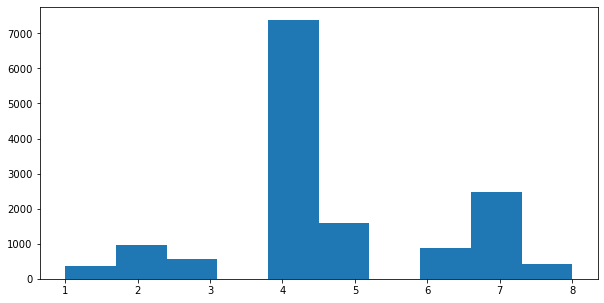

In [22]:
fig = plt.figure(figsize=(10,5))
plt.hist(data_train['category']);

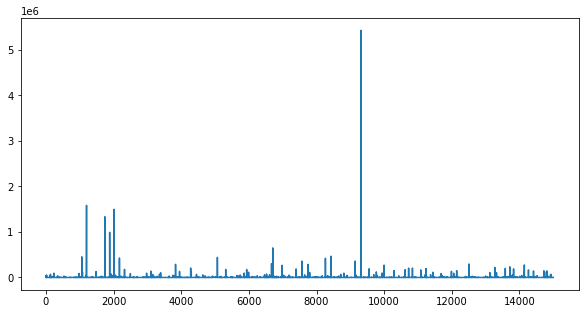

In [23]:
fig = plt.figure(figsize=(10,5))
plt.plot(data_train['adview']);

In [24]:
# remove outliers from adview column
data_train = data_train[data_train["adview"] <2000000]

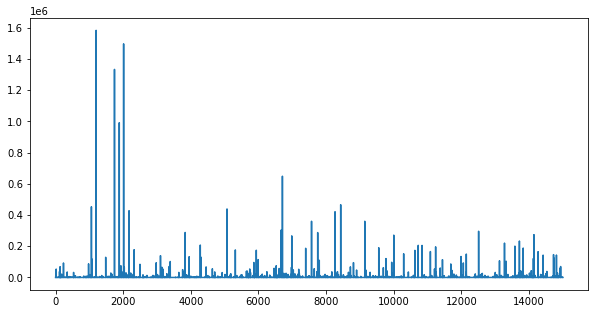

In [25]:
# visualize data without outlier records
fig = plt.figure(figsize=(10,5))
plt.plot(data_train['adview']);

In [26]:
import seaborn as sns

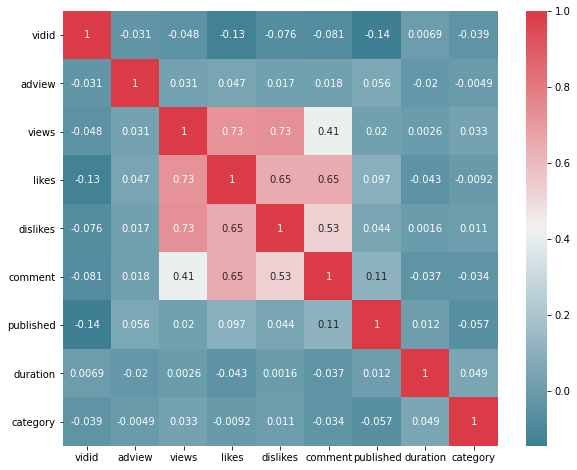

In [27]:
# check correlation of features in form of heatmap
f, ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True);

In [28]:
# split data
Y_train = pd.DataFrame(data = data_train.iloc[:,1].values, columns = ['target'])
data_train = data_train.drop(["adview"], axis = 1)
data_train = data_train.drop(["vidid"], axis = 1)

In [29]:
data_train.head(10)

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4
5,78,0,0,0,2040,15,4
6,43118,15,1,0,1778,200,4
7,14205,55,16,1,2124,58,5
8,526015,3064,211,2582,1855,1670,6
9,406992,3831,310,7839,2187,679,2


In [30]:
Y_train.head(10)

,target
0,40
1,2
2,1
3,6
4,1
5,4
6,40621
7,1
8,1
9,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# split data into training set and test dataset
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size = 0.2, random_state = 42)

In [33]:
X_train.shape

(11708, 7)

In [34]:
X_train

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,180,4
9523,1419766,887,362,232,1547,5811,7
3012,26086,19,0,9,966,178,6
1888,305445,3662,45,555,1484,257,7
11378,737649,1702,96,53,1127,895,4
...,...,...,...,...,...,...,...
5316,31648,140,24,14,1925,231,7
13748,1804,4,1,0,1049,232,4
5522,204817,86,35,11,1237,218,4
883,1361366,1384,757,185,2145,240,7


In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
# normalise data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
X_train.mean()

0.1739096800320488

In [38]:
#Evaluation metrics
from sklearn import metrics

In [39]:
def print_error(X_test, y_test, model_name): # calculates the errors
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [40]:
# Linear Regression
from sklearn import linear_model

In [41]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
# decision tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

Mean Absolute Error: 2875.071038251366
Mean Squared Error: 1203414782.90847
Root Mean Squared Error: 34690.26928273215


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
# random forest
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

<ipython-input-45-7e6b5d42d51c>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3288.729032973544
Mean Squared Error: 690549899.4825324
Root Mean Squared Error: 26278.316146255118


In [46]:
from sklearn.svm import SVR

In [47]:
# support vector regressor
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [48]:
import keras 
from keras.layers import Dense

In [49]:
# artificial neural network
ann = keras.models.Sequential([Dense(6, activation = "relu", input_shape = X_train.shape[1:]), Dense(6, activation = "relu"), Dense(1)])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ["mean_squared_error"])
history = ann.fit(X_train, y_train, epochs = 100)

Epoch 1/100
366/366 [==============================] - 1s 618us/step - loss: 949294756.3043 - mean_squared_error: 949294756.3043
Epoch 2/100
366/366 [==============================] - 0s 615us/step - loss: 1315881008.2343 - mean_squared_error: 1315881008.2343
Epoch 3/100
366/366 [==============================] - 0s 628us/step - loss: 423971682.5068 - mean_squared_error: 423971682.5068
Epoch 4/100
366/366 [==============================] - 0s 631us/step - loss: 895607241.8420 - mean_squared_error: 895607241.8420
Epoch 5/100
366/366 [==============================] - 0s 645us/step - loss: 601502140.5729 - mean_squared_error: 601502140.5729
Epoch 6/100
366/366 [==============================] - 0s 618us/step - loss: 857746325.0425 - mean_squared_error: 857746325.0425
Epoch 7/100
366/366 [==============================] - 0s 620us/step - loss: 663599837.1359 - mean_squared_error: 663599837.1359
Epoch 8/100
366/366 [==============================] - 0s 833us/step - loss: 609614016.7354 - m

Epoch 64/100
366/366 [==============================] - 0s 631us/step - loss: 529540438.3045 - mean_squared_error: 529540438.3045
Epoch 65/100
366/366 [==============================] - 0s 635us/step - loss: 607375032.0259 - mean_squared_error: 607375032.0259
Epoch 66/100
366/366 [==============================] - 0s 653us/step - loss: 618780119.7861 - mean_squared_error: 618780119.7861
Epoch 67/100
366/366 [==============================] - 0s 623us/step - loss: 747732861.2411 - mean_squared_error: 747732861.2411
Epoch 68/100
366/366 [==============================] - 0s 615us/step - loss: 1430302017.7623 - mean_squared_error: 1430302017.7623
Epoch 69/100
366/366 [==============================] - 0s 615us/step - loss: 732526061.7766 - mean_squared_error: 732526061.7766
Epoch 70/100
366/366 [==============================] - 0s 609us/step - loss: 533487266.2084 - mean_squared_error: 533487266.2084
Epoch 71/100
366/366 [==============================] - 0s 648us/step - loss: 863497129.

In [50]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [51]:
print_error(X_test, y_test, ann)

Mean Absolute Error: 3303.8669422428466
Mean Squared Error: 829839948.0249722
Root Mean Squared Error: 28806.942705274578


In [53]:
import joblib
# save model
joblib.dump(decision_tree, "decsiontree_youtubeadview.pkl")

['decsiontree_youtubeadview.pkl']

In [54]:
ann.save("ann_youtubeadview.h5")

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
#Import test.csv
data_test = pd.read_csv("test.csv")

In [4]:
data_test.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
5,VID_10315,145820,215,29,19,2014-01-23,PT39M18S,D
6,VID_7417,12921,169,3,73,2014-05-01,PT10M4S,D
7,VID_17788,4502,65,2,8,2016-07-13,PT2M35S,F
8,VID_14591,662956,1841,321,219,2014-01-13,PT13M57S,D
9,VID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,B


In [5]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data_test["category"] = data_test["category"].map(category)
data_test.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2
5,VID_10315,145820,215,29,19,2014-01-23,PT39M18S,4
6,VID_7417,12921,169,3,73,2014-05-01,PT10M4S,4
7,VID_17788,4502,65,2,8,2016-07-13,PT2M35S,6
8,VID_14591,662956,1841,321,219,2014-01-13,PT13M57S,4
9,VID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,2


In [6]:
#remove data that contains F
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [7]:
# convert string values to int data type
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
data_test.dtypes

vidid        object
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# encode features in numerical format
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])

In [10]:
data_test.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2
5,137,145820,215,29,19,965,1539,4
6,7531,12921,169,3,73,1060,56,4
7,3112,4502,65,2,8,1840,1348,6
8,1835,662956,1841,321,219,955,229,4
9,943,552009,6732,97,1100,1883,397,2


In [11]:
import datetime
import time

In [12]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [13]:
test = pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)
print(time)

0        00:7:29
1        00:6:29
2       00:37:54
3        00:9:55
4         00:3:8
          ...   
8759     00:3:14
8760     2:18:35
8761     00:7:14
8762     00:3:15
8763    00:10:14
Name: duration, Length: 8764, dtype: object


In [14]:
#convert time to seconds
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [15]:
time1 = time.apply(func_sec)
print(time1)

0        449
1        389
2       2274
3        595
4        188
        ... 
8759     194
8760    8315
8761     434
8762     195
8763     614
Name: duration, Length: 8764, dtype: int64


In [16]:
# replace duration with time in seconds
data_test["duration"] = time1
data_test.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2
5,137,145820,215,29,19,965,2358,4
6,7531,12921,169,3,73,1060,604,4
7,3112,4502,65,2,8,1840,155,6
8,1835,662956,1841,321,219,955,837,4
9,943,552009,6732,97,1100,1883,1069,2


In [17]:
data_test = data_test.drop(["vidid"], axis = 1)
data_test.head(10)

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2
5,145820,215,29,19,965,2358,4
6,12921,169,3,73,1060,604,4
7,4502,65,2,8,1840,155,6
8,662956,1841,321,219,955,837,4
9,552009,6732,97,1100,1883,1069,2


In [19]:
data_test.shape

(8549, 7)

In [20]:
import joblib

In [21]:
model = joblib.load("decisiontree_youtubeadview.pkl")

In [22]:
X_test = data_test

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# normalise data
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred)

[ 2. 21.  1. ... 12.  6.  6.]


In [33]:
data_test['adview'] = y_pred

In [34]:
data_test.head(10)

,views,likes,dislikes,comment,published,duration,category,adview
0,440238,6153,218,1377,2053,449,2,2.0
1,1040132,8171,340,1047,1825,389,6,21.0
2,28534,31,11,1,1009,2274,4,1.0
3,1316715,2284,250,274,116,595,7,9.0
4,1893173,2519,225,116,1892,188,2,67985.0
5,145820,215,29,19,965,2358,4,1.0
6,12921,169,3,73,1060,604,4,1.0
7,4502,65,2,8,1840,155,6,5.0
8,662956,1841,321,219,955,837,4,77.0
9,552009,6732,97,1100,1883,1069,2,2.0


In [36]:
adview = data_test['adview']

In [38]:
adview.to_csv("prediction.csv")